# 사용할 데이터셋 및 라이브러리
 - 데이터셋 : 한국_콘텐츠_인지_경로_20231229141943.csv
 - 라이브러리 : numpy, pandas, matplotlib, seaborn

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


# 데이터셋 불러오기

In [2]:
kdrama = pd.read_csv("한국_콘텐츠_인지_경로_20231229141943.csv", encoding='cp949')
kdrama

,구분별(1),구분별(2),2022,2022.1,2022.2,2022.3,2022.4,2022.5,2022.6,2022.7,2022.8,2022.9,2022.10
0,구분별(1),구분별(2),사례수 (명),뉴스/기사,TV/인터넷 등 광고,소셜 네트워크 서비스(SNS),OTT 플랫폼,음악 사이트/APP,웹툰/웹소설 사이트/APP,DVD CD 비디오 테이프,팬카페/커뮤니티,가족/지인 소개,P2P 사이트 등 비합법적 경로
1,전체,소계,1144,15.6,35.8,38.3,41.3,14.5,12.0,4.8,7.7,25.4,1.3
2,성별,남자,549,18.8,38.6,38.6,43.5,16.0,13.7,6.2,8.9,23.3,2.0
3,성별,여자,595,12.8,33.3,38.0,39.3,13.1,10.4,3.5,6.6,27.4,0.7
4,연령별,15-19세,170,15.9,39.4,47.6,34.7,15.3,15.9,1.2,10.6,26.5,0.6
5,연령별,20-29세,334,10.5,35.6,43.7,37.4,18.3,12.9,6.9,8.7,20.7,1.5
6,연령별,30-39세,346,15.9,37.3,36.7,42.5,14.7,12.4,5.2,4.6,26.9,0.6
7,연령별,40-49세,231,20.3,35.5,30.3,48.1,11.3,9.5,4.3,10.0,27.7,2.6
8,연령별,50-54세,63,23.8,20.6,22.2,49.2,3.2,3.2,3.2,3.2,31.7,1.6
9,소비 타깃별,25-44세,626,15.2,36.1,39.5,42.8,15.3,12.1,5.6,7.5,24.1,1.3


# 데이터 크기 확인하기

In [4]:
size, columns = kdrama.shape

print('총 데이터 개수:', size)
print('총 컬럼 수:', columns)

총 데이터 개수: 18
총 컬럼 수: 13


In [5]:
kdrama.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   구분별(1)   18 non-null     object
 1   구분별(2)   18 non-null     object
 2   2022     18 non-null     object
 3   2022.1   18 non-null     object
 4   2022.2   18 non-null     object
 5   2022.3   18 non-null     object
 6   2022.4   18 non-null     object
 7   2022.5   18 non-null     object
 8   2022.6   18 non-null     object
 9   2022.7   18 non-null     object
 10  2022.8   18 non-null     object
 11  2022.9   18 non-null     object
 12  2022.10  18 non-null     object
dtypes: object(13)
memory usage: 2.0+ KB


# 연령별 미디어 증가 수치 시각화를 위해 연령별로 데이터 분류

In [7]:
# 연령대로 데이터 분류
age_groups = kdrama[kdrama['구분별(1)'] == '연령별'].copy()

# 컬럼명 변경
new_column_names = {
    '구분별(2)': '연령대',
    '2022': '사례수(명)',
    '2022.1': '뉴스/기사',
    '2022.2': 'TV/인터넷 등 광고',
    '2022.3': '소셜 네트워크 서비스(SNS)',
    '2022.4': 'OTT 플랫폼',
    '2022.5': '음악 사이트/APP',
    '2022.6': '웹툰/웹소설 사이트/APP',
    '2022.7': 'DVD CD 비디오 테이프',
    '2022.8': '팬카페/커뮤니티',
    '2022.9': '가족/지인 소개',
    '2022.10': 'P2P 사이트 등 비합법적 경로'
}

age_groups.rename(columns=new_column_names, inplace=True)

age_groups

,구분별(1),연령대,사례수(명),뉴스/기사,TV/인터넷 등 광고,소셜 네트워크 서비스(SNS),OTT 플랫폼,음악 사이트/APP,웹툰/웹소설 사이트/APP,DVD CD 비디오 테이프,팬카페/커뮤니티,가족/지인 소개,P2P 사이트 등 비합법적 경로
4,연령별,15-19세,170,15.9,39.4,47.6,34.7,15.3,15.9,1.2,10.6,26.5,0.6
5,연령별,20-29세,334,10.5,35.6,43.7,37.4,18.3,12.9,6.9,8.7,20.7,1.5
6,연령별,30-39세,346,15.9,37.3,36.7,42.5,14.7,12.4,5.2,4.6,26.9,0.6
7,연령별,40-49세,231,20.3,35.5,30.3,48.1,11.3,9.5,4.3,10.0,27.7,2.6
8,연령별,50-54세,63,23.8,20.6,22.2,49.2,3.2,3.2,3.2,3.2,31.7,1.6


# 연령별 미디어 증가 수치 시각화

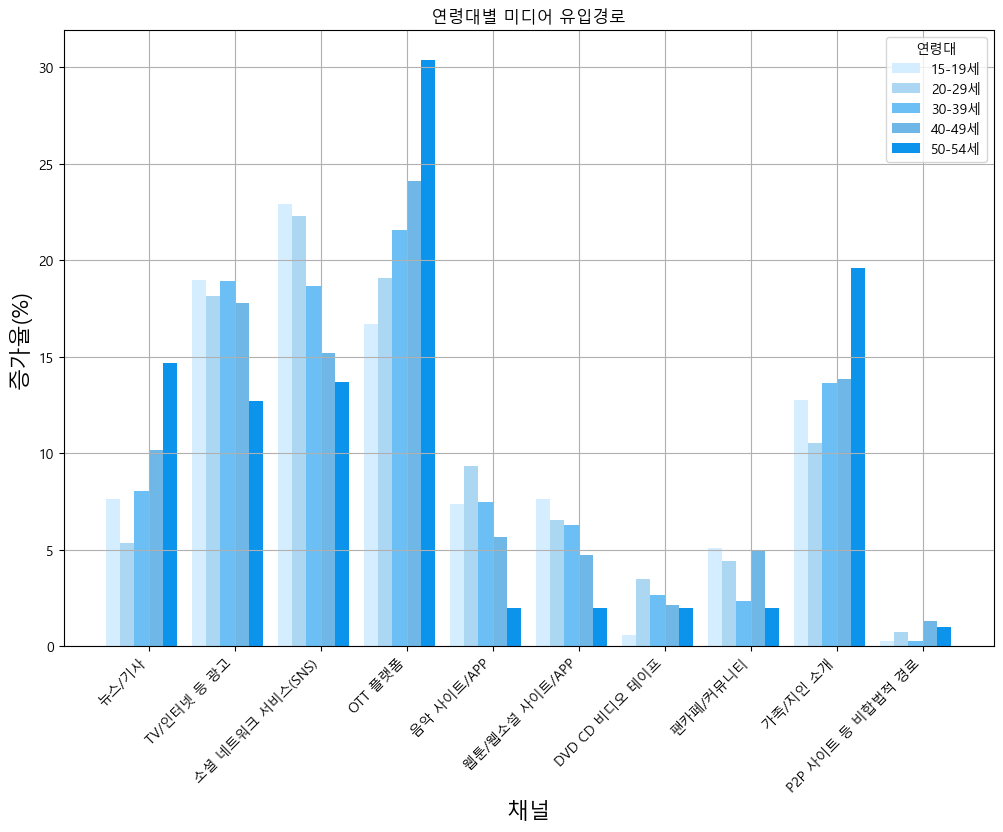

In [53]:
plt.rcParams['font.family'] = 'Malgun Gothic'
# 연령대별로 데이터 추출
age_labels = age_groups['연령대'].tolist()
data_columns = age_groups.columns[3:]

# '사례수(명)' 열을 숫자로 변환
age_groups['사례수(명)'] = pd.to_numeric(age_groups['사례수(명)'], errors='coerce')

# 전체 데이터프레임을 숫자로 변환
age_groups[data_columns] = age_groups[data_columns].apply(pd.to_numeric, errors='coerce')

# 연령대별로 데이터 추출
age_labels = age_groups['연령대'].tolist()
data_columns = age_groups.columns[3:]

# 그래프 그리기
bar_width = 0.25  # 각 그래프의 너비 조정
bar_positions = np.arange(len(data_columns)) * 1.5  # 그래프 간의 간격 조정

colors = ['#d4eeff', '#acd7f2', '#6cbff5', '#6eb7e6', '#0c93eb']

plt.figure(figsize=(12, 8))

total_cases = age_groups['사례수(명)'].sum()

for i, age_label in enumerate(age_labels):
    percentages = (age_groups['사례수(명)'].iloc[i] / total_cases) * 100
    plt.bar(
        bar_positions + i * bar_width, 
        age_groups[data_columns].iloc[i] * 100 / age_groups[data_columns].iloc[i].sum(), 
        label=age_label,  # 연령대만 표시
        width=bar_width,
        color=colors[i]
    )

plt.xlabel('채널', fontsize=16)
plt.ylabel('증가율(%)', fontsize=16)
plt.title('연령대별 미디어 유입경로')
plt.xticks(bar_positions + 1.5 * bar_width, data_columns, rotation=45, ha="right")  # X 축 레이블 설정 및 회전
plt.legend(title='연령대')

# yticks 설정
# max_ytick = int(age_groups[data_columns].sum().max() + 50)
plt.yticks(np.arange(0, 31, 5))

# xticks 설정
plt.xticks(bar_positions + (len(age_labels) / 2) * bar_width, data_columns, rotation=45, ha="right")

plt.grid()

plt.savefig('age_media.png', dpi = 200, bbox_inches = 'tight')

plt.show()


# 40~60대 OTT이용 관련 기사

## https://biz.sbs.co.kr/article/20000150523 
## http://www.jeonpa.co.kr/news/articleView.html?idxno=89121

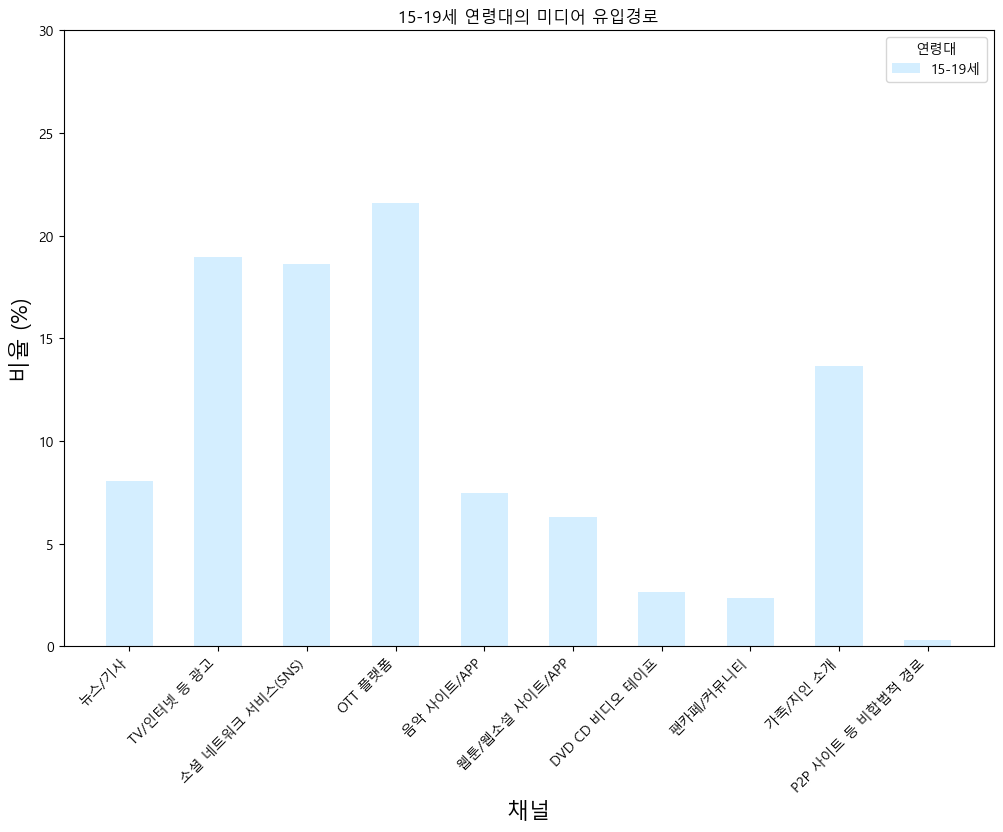

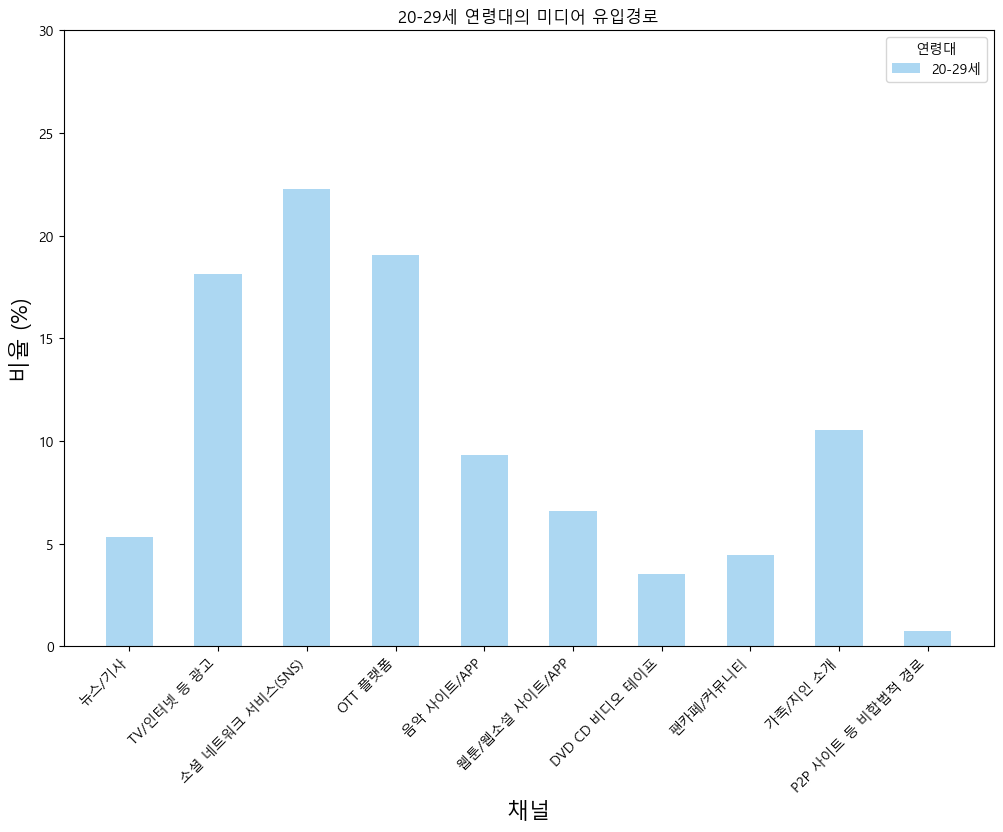

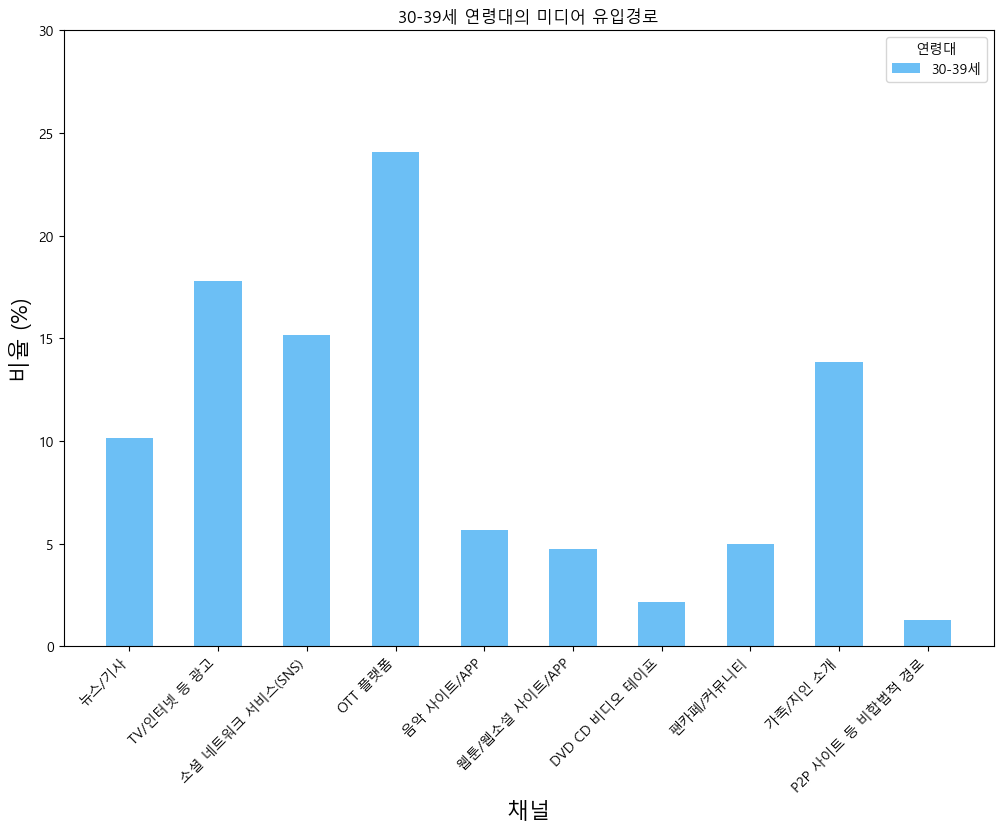

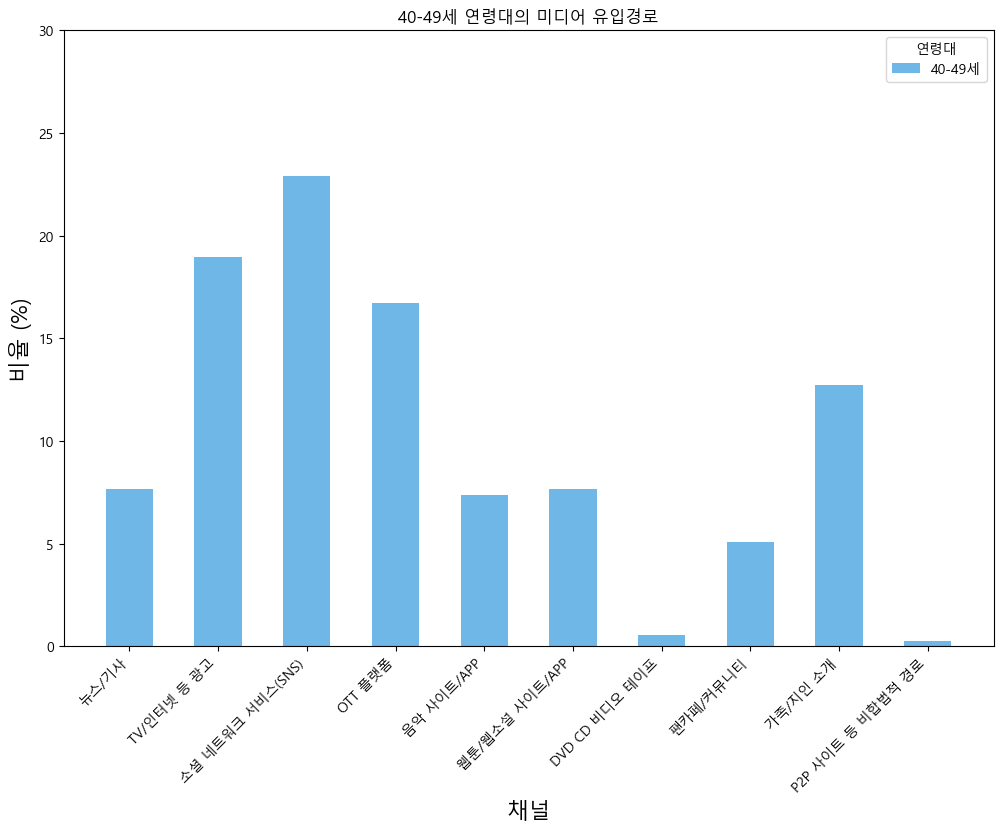

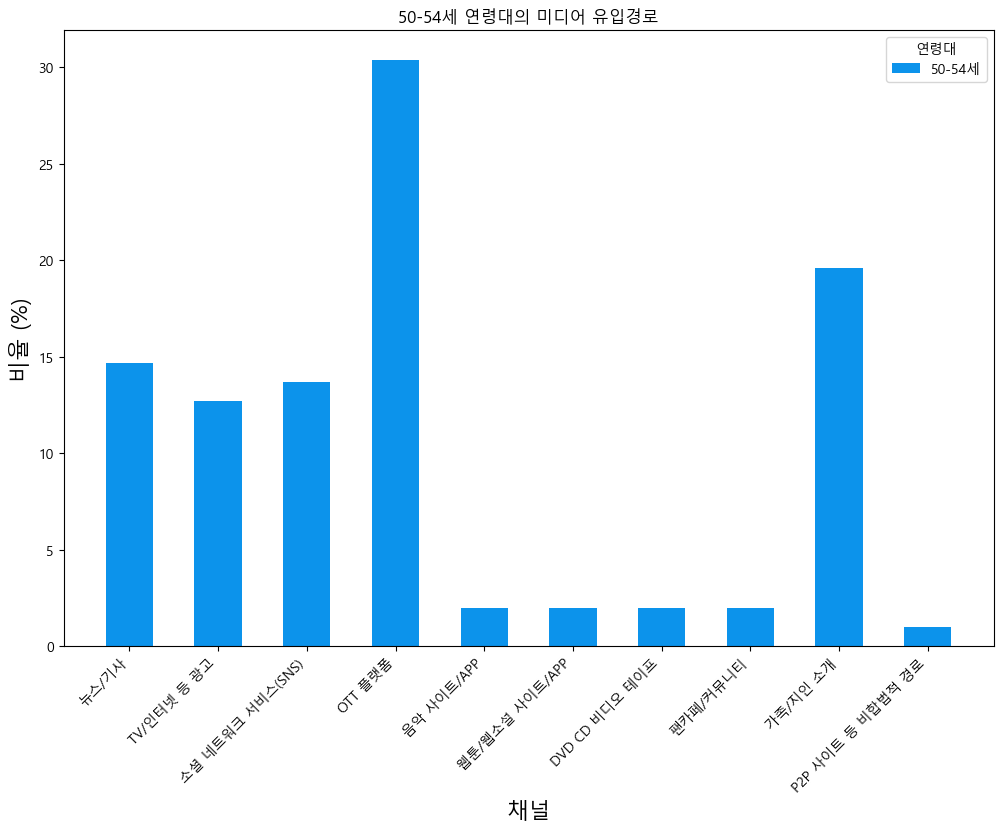

In [34]:
plt.rcParams['font.family'] = 'Malgun Gothic'

# 연령대별로 데이터 추출
age_labels = age_groups['연령대'].tolist()
data_columns = age_groups.columns[3:]

# '사례수(명)' 열을 숫자로 변환
age_groups['사례수(명)'] = pd.to_numeric(age_groups['사례수(명)'], errors='coerce')

# 전체 데이터프레임을 숫자로 변환
age_groups[data_columns] = age_groups[data_columns].apply(pd.to_numeric, errors='coerce')

# 데이터를 내림차순으로 정렬
age_groups_sorted = age_groups.sort_values(by='사례수(명)', ascending=False)

# 그래프 그리기
bar_width = 0.8  # 각 그래프의 너비 조정
bar_positions = np.arange(len(data_columns)) * 1.5  # 그래프 간의 간격 조정

colors = ['#d4eeff', '#acd7f2', '#6cbff5', '#6eb7e6', '#0c93eb']

total_cases = age_groups_sorted['사례수(명)'].sum()

# 개별 연령대에 대한 그래프 생성
for i, age_label in enumerate(age_labels):
    plt.figure(figsize=(12, 8))

    percentages = (age_groups_sorted['사례수(명)'].iloc[i] / total_cases) * 100
    plt.bar(
        bar_positions,
        age_groups_sorted[data_columns].iloc[i] * 100 / age_groups_sorted[data_columns].iloc[i].sum(),
        label=age_label,  # 연령대만 표시
        width=bar_width,
        color=colors[i]
    )

    plt.xlabel('채널', fontsize=16)
    plt.ylabel('비율 (%)', fontsize=16)
    plt.title(f'{age_label} 연령대의 미디어 유입경로')
    plt.xticks(bar_positions + 0.5 * bar_width, data_columns, rotation=45, ha="right")  # X 축 레이블 설정 및 회전
    plt.legend(title='연령대')

    # yticks 설정
    plt.yticks(np.arange(0, 31, 5))

    # xticks 설정
    plt.xticks(bar_positions, data_columns, rotation=45, ha="right")


#     plt.savefig(f'age_media_{age_label}_sorted.png', dpi=200, bbox_inches='tight')

    plt.show()

